# Estación Tres Olivos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_60.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,41.419355
2013-02-01,30.741935
2013-03-01,24.612903
2013-04-01,22.193548
2013-05-01,20.483871


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

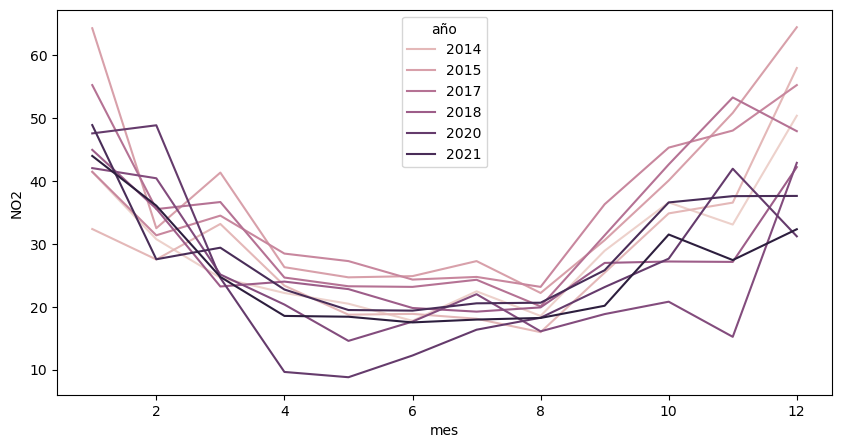

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

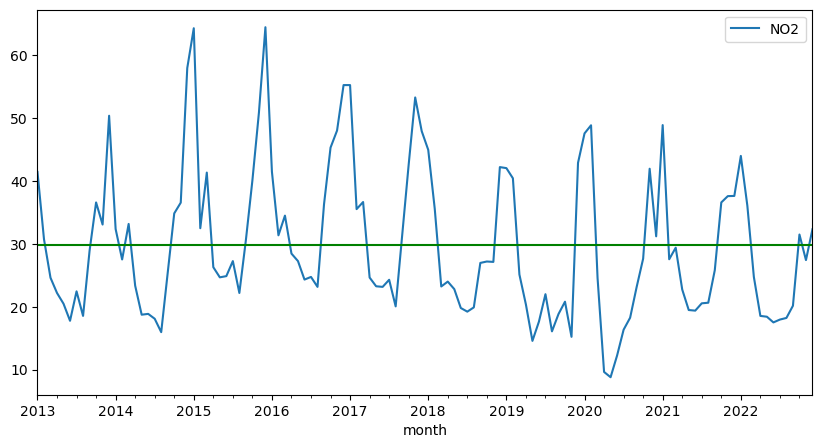

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

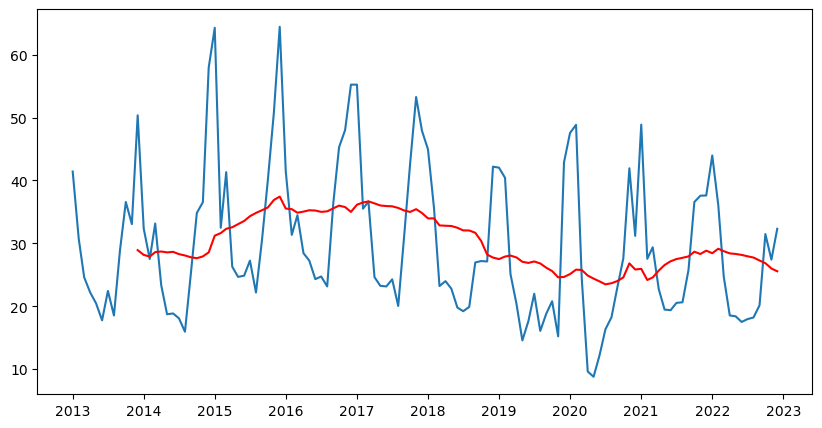

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,41.419355
2013-02-01,30.741935
2013-03-01,24.612903
2013-04-01,22.193548
2013-05-01,20.483871


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,41.419355,2013,1
2013-02-01,30.741935,2013,2
2013-03-01,24.612903,2013,3
2013-04-01,22.193548,2013,4
2013-05-01,20.483871,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,41.419355,2013,1
2013-02-01,30.741935,2013,2
2013-03-01,24.612903,2013,3
2013-04-01,22.193548,2013,4
2013-05-01,20.483871,2013,5


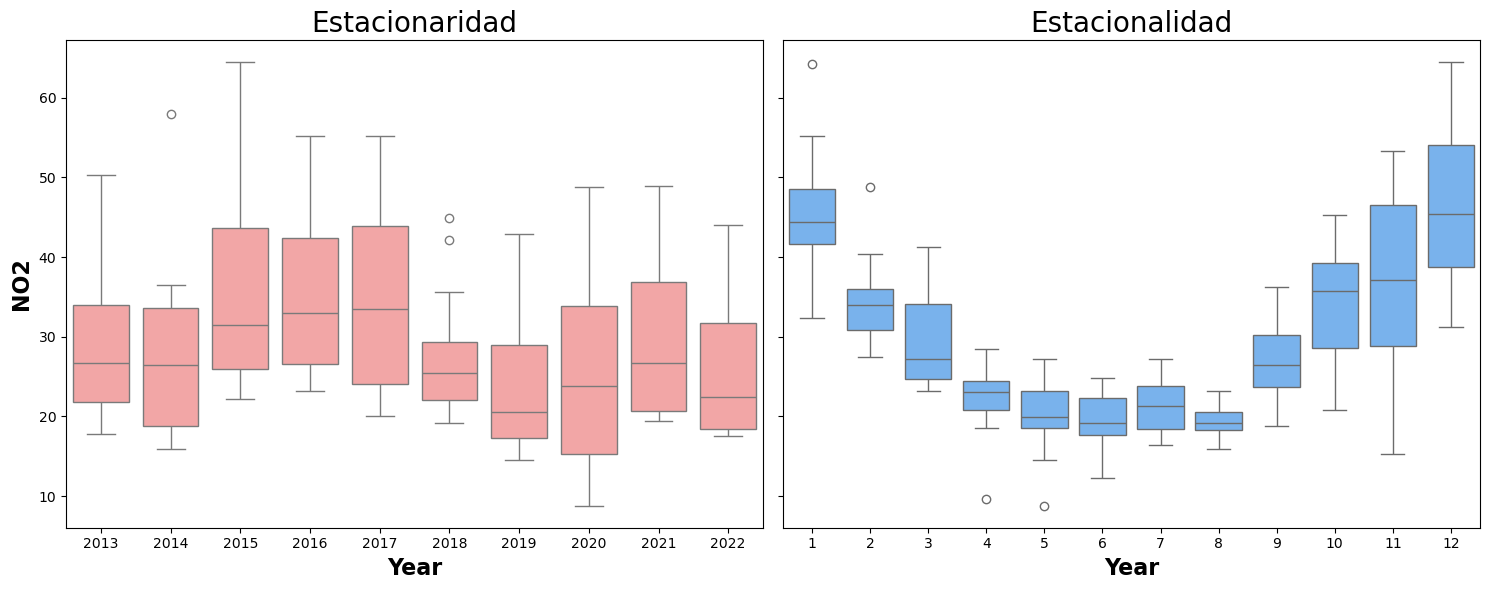

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores
colores = ["#FF9999", "#66B2FF"]

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-0.8016107217849398,
 0.8186484723529901,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 718.5352322818735)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.8016107217849398
p-value 0.8186484723529901
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6916860688273124
2 mes Lag, 0.39497472788217103
3 mes Lag, 0.05050406384136313
4 mes Lag, -0.256629139240463
5 mes Lag, -0.4103853293523122
6 mes Lag, -0.44953329334105313
7 mes Lag, -0.4271885690681765
8 mes Lag, -0.25687656332418024
9 mes Lag, 0.054129347674292894
10 mes Lag, 0.3611663017695807
11 mes Lag, 0.6300255579574852
12 mes Lag, 0.7613714387620583
13 mes Lag, 0.6314508257091647
14 mes Lag, 0.33736428953714165
15 mes Lag, 0.056308141959389345
16 mes Lag, -0.27166486245877736
17 mes Lag, -0.46041674019522
18 mes Lag, -0.5039777033941777
19 mes Lag, -0.46539018040666513
20 mes Lag, -0.2831100864991089
21 mes Lag, 0.008300631612756931
22 mes Lag, 0.24726471536465006
23 mes Lag, 0.5255219363326874
24 mes Lag, 0.6710609056750668
25 mes Lag, 0.5624567075544628
26 mes Lag, 0.30674347405368974
27 mes Lag, -0.0056596427955125615
28 mes Lag, -0.3270577851146297
29 mes Lag, -0.5297433758860345
30 mes Lag, -0.5823387246507282
31 mes Lag, -0.5316595036132836
32 

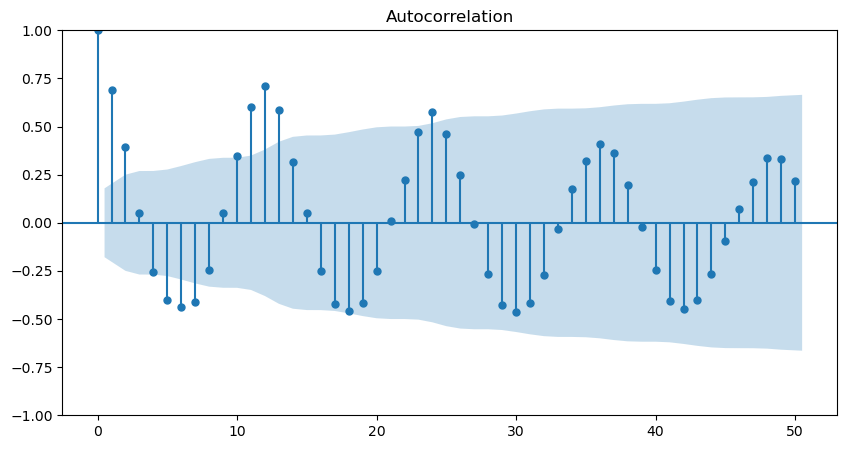

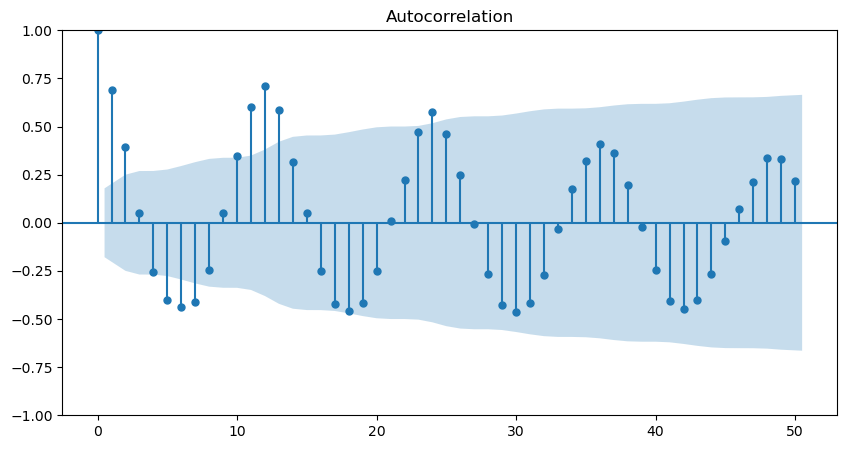

In [19]:
plot_acf(df, lags = 50)

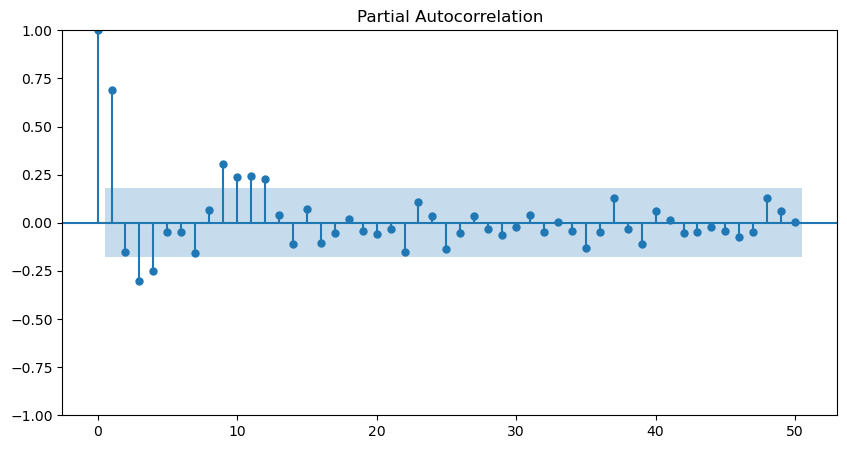

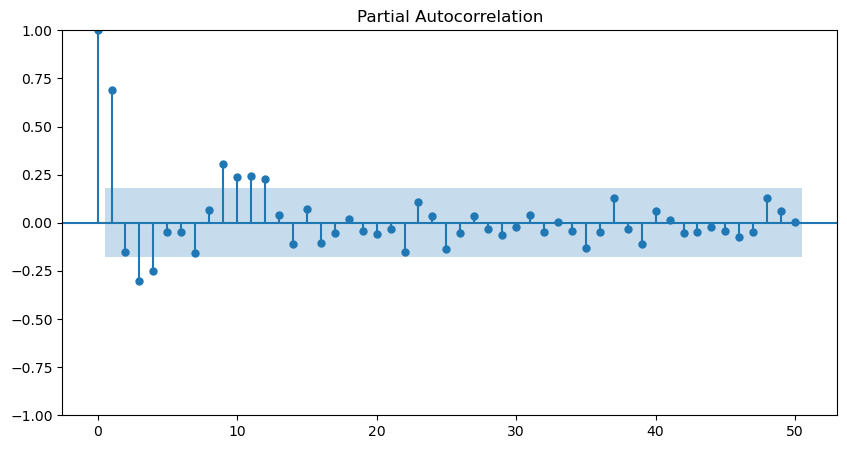

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,41.419355
2013-02-01,30.741935
2013-03-01,24.612903
2013-04-01,22.193548
2013-05-01,20.483871


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

CPU times: total: 578 ms
Wall time: 1.22 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
20,6.004968,"(3, 1, 2)"
14,7.179940,"(2, 1, 2)"
19,8.714190,"(3, 1, 1)"
8,8.895621,"(1, 1, 2)"
18,16.683334,"(3, 1, 0)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(3, 1, 2),  # modelo arima
               seasonal_order=(3, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  7.856838974724533
CPU times: total: 1.3 s
Wall time: 4.98 s


,real,pred,error
2020-07-01,16.354839,17.478855,1.124016
2020-08-01,18.258065,15.913866,-2.344198
2020-09-01,23.129032,19.301670,-3.827363
2020-10-01,27.645161,19.563285,-8.081877
2020-11-01,41.935484,15.199216,-26.736268
2020-12-01,31.193548,48.061868,16.868320
2021-01-01,48.870968,49.201197,0.330229
2021-02-01,27.548387,44.630035,17.081648
2021-03-01,29.387097,31.518127,2.131030
2021-04-01,22.741935,15.403307,-7.338628


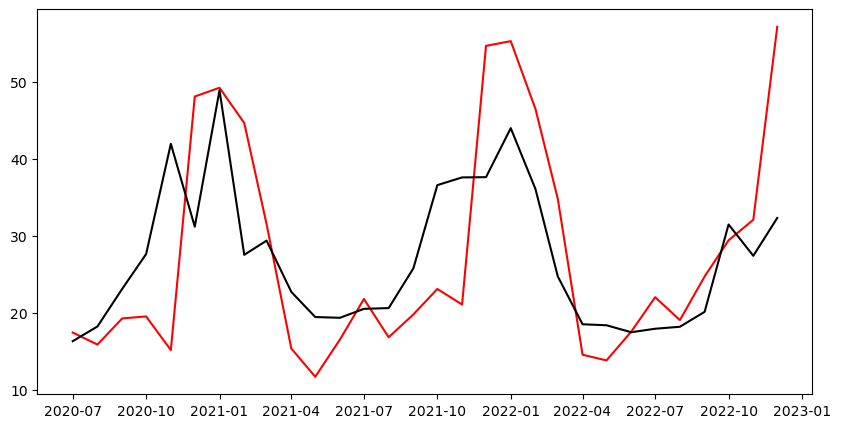

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,55.221690
2023-02-01,43.326822
2023-03-01,35.586934
2023-04-01,19.398344
2023-05-01,18.082641
2023-06-01,20.558641
2023-07-01,24.003013
2023-08-01,20.372011
2023-09-01,27.406517
2023-10-01,33.321459


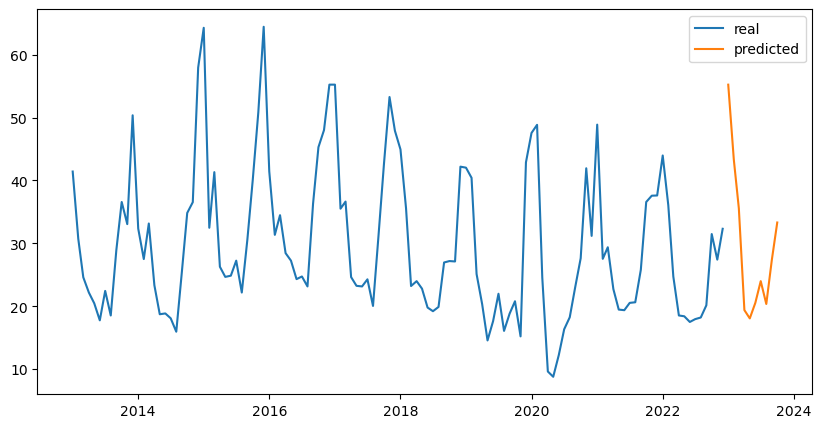

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,55.221690
2023-02-01,43.326822
2023-03-01,35.586934
2023-04-01,19.398344
2023-05-01,18.082641
2023-06-01,20.558641
2023-07-01,24.003013
2023-08-01,20.372011
2023-09-01,27.406517
2023-10-01,33.321459


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
real = df23[df23["ESTACION"] == 60]
real

,Unnamed: 0,ESTACION,ANO,MES,NO2
228,228,60,2023,1,27.387097
229,229,60,2023,2,31.064516
230,230,60,2023,3,20.870968
231,231,60,2023,4,14.806452
232,232,60,2023,5,9.967742
233,233,60,2023,6,10.870968
234,234,60,2023,7,13.483871
235,235,60,2023,8,13.935484
236,236,60,2023,9,19.870968
237,237,60,2023,10,20.806452


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(real)

,Unnamed: 0,NO2
month,,
2023-01-01,228,27.387097
2023-02-01,229,31.064516
2023-03-01,230,20.870968
2023-04-01,231,14.806452
2023-05-01,232,9.967742
2023-06-01,233,10.870968
2023-07-01,234,13.483871
2023-08-01,235,13.935484
2023-09-01,236,19.870968


In [39]:
real.drop("Unnamed: 0", axis=1, inplace=True)

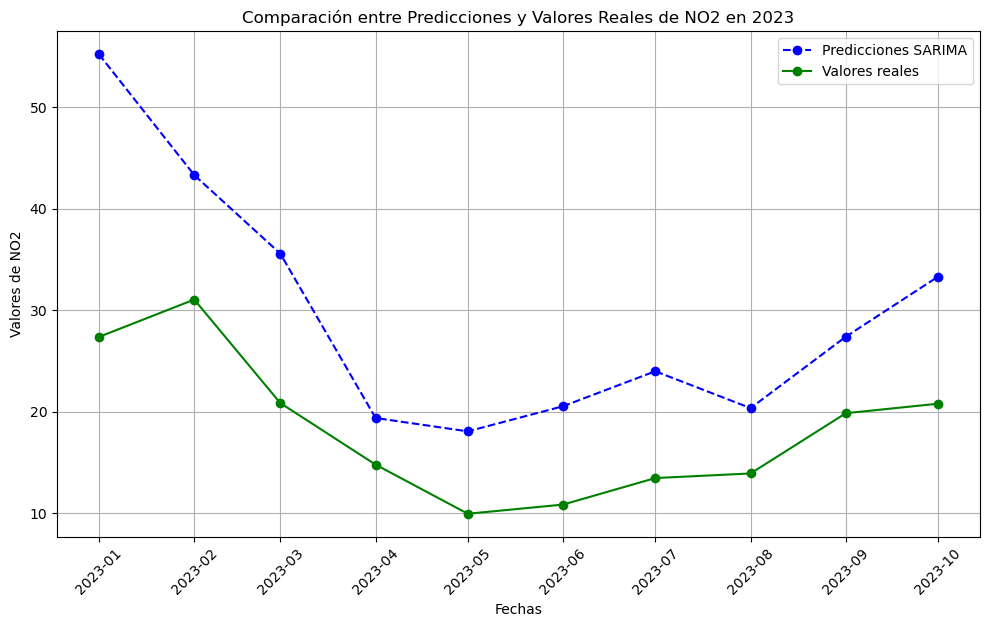

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

pred_año.index = pd.to_datetime(pred_año.index)
real.index = pd.to_datetime(real.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = real['NO2']['2023-01':'2023-10']

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

plt.show()

In [41]:
pred_año["predicted_mean"]
real["NO2"]

month
2023-01-01    27.387097
2023-02-01    31.064516
2023-03-01    20.870968
2023-04-01    14.806452
2023-05-01     9.967742
2023-06-01    10.870968
2023-07-01    13.483871
2023-08-01    13.935484
2023-09-01    19.870968
2023-10-01    20.806452
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [42]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,55.221690
2023-02-01,43.326822
2023-03-01,35.586934
2023-04-01,19.398344
2023-05-01,18.082641
2023-06-01,20.558641
2023-07-01,24.003013
2023-08-01,20.372011
2023-09-01,27.406517
2023-10-01,33.321459


In [45]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de los datos reales
frames = [real, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,27.387097
2023-02-01,31.064516
2023-03-01,20.870968
2023-04-01,14.806452
2023-05-01,9.967742
2023-06-01,10.870968
2023-07-01,13.483871
2023-08-01,13.935484
2023-09-01,19.870968
2023-10-01,20.806452


In [46]:
#Corrección valores

ultimas_fechas = df_extendido.index[-2:]  # Obtener las dos últimas fechas

# Acceder a las filas correspondientes a esas fechas
ultimas_filas = df_extendido.loc[ultimas_fechas]

# Multiplicar los valores de la columna 'NO2' por 0.8 en esas filas
ultimas_filas['NO2'] *= 0.8

df_extendido.loc[ultimas_fechas] = ultimas_filas

In [47]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    21.359422
dtype: float64

In [48]:
dff = df_predict23.to_frame()
dff = dff.rename(columns={0: "Tres Olivos"})
dff

,Tres Olivos
NO2,21.359422


In [49]:
dff.to_csv('../../clean_visuals/predicts23/60_Tres_Olivos.csv', index=True)